# Lupus Tweet Analysis

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib
import seaborn as sns
%matplotlib inline

### Access the Data 
Create the dataframes `tweets` and `orig_tweets` 

In [3]:
conn = sqlite3.connect("en_lupus.sqlite") # open the SQLite connection 
tweets = pd.read_sql_query("SELECT * FROM hashtags;", conn) # get all the tweets
tweets['created_at'] = pd.to_datetime(tweets['created_at']) # convert strings to timestamps  
orig_tweets = tweets[tweets['retweeted_status'] == 0] # only original tweets, i.e. no retweets
conn.close() # close the SQLite connection

List of columns in the DataFrame:

In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285447 entries, 0 to 285446
Data columns (total 41 columns):
id                           285447 non-null int64
query                        285447 non-null object
tweet_id                     285447 non-null int64
inserted_date                285447 non-null object
truncated                    285447 non-null object
language                     285447 non-null object
possibly_sensitive           285447 non-null object
coordinates                  285447 non-null object
retweeted_status             285447 non-null int64
created_at_text              285447 non-null object
created_at                   285447 non-null datetime64[ns]
content                      285447 non-null object
from_user_screen_name        285447 non-null object
from_user_id                 285447 non-null object
from_user_followers_count    285447 non-null int64
from_user_friends_count      285447 non-null int64
from_user_listed_count       285447 non-null int64
fro

## 1 – Simple Visualization

### Tweet Frequency by Day of Week

Axes(0.125,0.125;0.775x0.755)


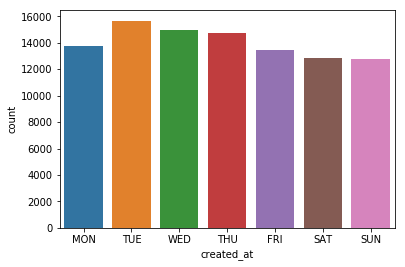

In [5]:
day_of_week_names = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
orig_tweet_day_of_week = orig_tweets['created_at'].apply(lambda t: day_of_week_names[t.dayofweek])
print(sns.countplot(orig_tweet_day_of_week, order=day_of_week_names))

### Tweet Frequency by Hour of Day

Axes(0.125,0.125;0.775x0.755)


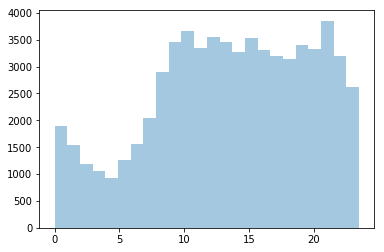

In [6]:
local_time_hours = orig_tweets[['created_at', 'utc_offset']].dropna().apply(
    lambda r: r['created_at'].hour + r['utc_offset'] / 3600.0, axis=1)
local_time_hours = local_time_hours.apply(lambda t: t + 24 if t < 0 else t % 24)
print(sns.distplot(local_time_hours, bins = 24, kde=False))

## 2 – Articles
#### Dig deeper into which articles are shared 

### Links posted by users with most followers

In [7]:
shared_urls = tweets[tweets['entities_urls_count'] > 0][['tweet_id', 'from_user_screen_name', 
                                                         'content', 'entities_urls', 'from_user_followers_count']]
shared_urls = shared_urls.sort_values(by='from_user_followers_count', ascending=False)
shared_urls.head(10)

,tweet_id,from_user_screen_name,content,entities_urls,from_user_followers_count
13266,912122892988665856,voguemagazine,A staggering 90% of the 1.5 million Americans ...,https://t.co/DQyYfCtuno,13382225
93030,932816108477927426,enews,Selena Gomez is committed to finding a cure fo...,https://t.co/36mx64qA5n,11889081
63373,925426333106294784,enews,Selena Gomez says she's not proud of how hard ...,https://t.co/U1dnA9Zn5n,11833431
61568,925700090005737472,enews,Selena Gomez says she's not proud of how hard ...,https://t.co/8B6ctbGnKi,11833431
55417,925052516999532544,enews,"After receiving a new kidney, Selena Gomez say...",https://t.co/4t1xXhdNk7,11823012
53303,925351310341189633,enews,Selena Gomez says she's not proud of how hard ...,https://t.co/KbA2VSfnYM,11823011
216692,956512033205379075,people,Today On #PeopleNow - Toni Braxton on Fellow L...,https://t.co/IxFfB0cTvT,7875504
215991,956648098201206787,people,Toni Braxton Reveals How 'Brave' Fellow Lupus ...,https://t.co/kK2z0J7Oxt,7875503
215304,956679479740510210,people,Toni Braxton Says Fellow Lupus Sufferer Selena...,https://t.co/NPCqK6Q8X8,7875502
215298,956679790295175168,people,Toni Braxton Says Fellow Lupus Sufferer Selena...,https://t.co/5ttMi4e7PK,7875502


### Links that are retweeted the most

In [8]:
retweeted_urls = orig_tweets[orig_tweets['entities_urls_count'] > 0][['tweet_id', 'from_user_screen_name', 'content', 'entities_urls', 'retweet_count']]
retweeted_urls = retweeted_urls.sort_values(by='retweet_count', ascending=False)
retweeted_urls.head(10)

,tweet_id,from_user_screen_name,content,entities_urls,retweet_count
258296,966667401025683456,sylphanne,1. He’s roughly 5’11.\n2. They live with him; ...,https://t.co/QrZlR2bgQB,5971
148299,944146015279616000,leahjavon,"A RT can save my life. I’m 23, I have Lupus &a...",https://t.co/EA2q4D2Zwk,1727
190278,951845988800528391,morethanmySLE,This is ANOTHER lie by this administration.\n\...,https://t.co/toFfexoHcR,748
23002,917869764650962945,morethanmySLE,"At 630am, I drag myself out of bed to take the...",https://t.co/8lasGSFHyM,634
276881,970433601279025154,SLSmith000,"A year ago, I could afford my monthly lupus me...",https://t.co/uq3ZXQeU6e,608
109039,934890532471369728,AlexWassabi,IM SORRY @selenagomez! \nJust found out that t...,https://t.co/Eo2QjoGfRL,570
56867,924970855448367105,TODAYshow,What is lupus? Learn about the disease that @S...,https://t.co/bLQ2izHZa7,467
212133,956296466829578240,gagamonster96,The surprise is out!\n\nLady Gaga recorded a p...,https://t.co/Wo59fMwX0u,426
93030,932816108477927426,enews,Selena Gomez is committed to finding a cure fo...,https://t.co/36mx64qA5n,423
216503,956567367080906752,billboard,Lady Gaga teases music video for new piano ver...,https://t.co/pm9gtTrSOr,410


## 3 – Misc

In [9]:
most_retweets = orig_tweets.sort_values(by='retweet_count', ascending=False)
most_retweets[['tweet_id', 'content']].head(20)

,tweet_id,content
246314,964777867128209409,"""I was a beauty with brain an alumni of UoN an..."
258296,966667401025683456,1. He’s roughly 5’11.\n2. They live with him; ...
118508,935645906552139783,I never knew her and she never knew me. But my...
137350,940604292603531264,"Dear Alabama,\n\nI am a #cancer survivor &amp;..."
103587,934240606137802752,There is a cure for cancer - His Name is Jesus...
148299,944146015279616000,"A RT can save my life. I’m 23, I have Lupus &a..."
92817,932821339634888704,Selena Gomez shows she’s committed to finding ...
120943,936995174860894208,"Dear @SenateGOP, \n\nI take 38 different💊💊 yea..."
139739,941769905224978433,Dear @SenatorCollins @SenJohnMcCain @JeffFlake...
226062,959908514490650624,I live with #Lupus and I'm a #cancer survivor....
